In [1]:
# Change Python path
import os, sys
os.chdir("/LOCALDATA/ARTHURs_FILES/Codigos/")
print(os.getcwd())
sys.path.append('python_modules')

# Enables modules autoreload (important during development)
%load_ext autoreload
%autoreload 2

/LOCALDATA/ARTHURs_FILES/Codigos


In [380]:
from data_managers.load_dataset import load_cmems_sst, load_cmems_mfc, load_dragonera_insitu

# Load CMEMS-SST data near Dragonera
ds_cmems_sst = load_cmems_sst(
    years=range(2009, 2023),
    lon_selector=2.10,
    lat_selector=39.56,
)

# Load CMEMS-MFC data near Dragonera at surface (0m) and depth (3m)
ds_cmems_mfc = load_cmems_mfc(
    years=range(2009, 2022),
    lon_selector=2.10,
    lat_selector=39.56,
    depth_selector=[0,3],
    move_to_0am=True
)
ds_cmems_mfc_sst = ds_cmems_mfc.sel(depth=0, method="nearest")
ds_cmems_mfc_d   = ds_cmems_mfc.sel(depth=3, method="nearest")

# Use all data and avg window centered at 12am (still, result is at 0am)
ds_dragonera_insitu_daily = load_dragonera_insitu(daily_avg=True, drop_depth=True)

# Use only nightime data and avg window centered at 12am THIS ONE IS USED FINALLY
ds_dragonera_insitu_daily_night = load_dragonera_insitu(
    nightime_data=True,
    daily_avg=True,
    drop_depth=True
)

_ _ _ _

In [381]:
from data_statistics.compare_datasets import basic_stats

In [385]:
# SST - Insitu
basic_stats(ds_cmems_sst, ds_dragonera_insitu_daily_night, var_name="T")

Bias: 0.07 °C (0.065689)
RMSE: 0.36 °C (0.361619)
STDE: 0.36 °C (0.355602)


In [386]:
# MFCs - MFCd
basic_stats(ds_cmems_mfc_sst, ds_cmems_mfc_d, var_name="T")

Bias: 0.09 °C (0.090233)
RMSE: 0.18 °C (0.182481)
STDE: 0.16 °C (0.158610)


In [387]:
# MFCd - Insitu (all day)
basic_stats(ds_cmems_mfc_d, ds_dragonera_insitu_daily, var_name="T")

[########################################] | 100% Completed | 60.14 s
Bias: -0.21 °C (-0.212624)
RMSE: 0.47 °C (0.472063)
STDE: 0.42 °C (0.421467)


In [388]:
# MFCd - Insitu (night)
basic_stats(ds_cmems_mfc_d, ds_dragonera_insitu_daily_night, var_name="T")

[########################################] | 100% Completed | 86.65 s
Bias: -0.12 °C (-0.124806)
RMSE: 0.39 °C (0.390683)
STDE: 0.37 °C (0.370212)


In [390]:
# MFCs - SSST
basic_stats(ds_cmems_mfc_sst, ds_cmems_sst, var_name="T")

[########################################] | 100% Completed | 113.83 s
Bias: -0.10 °C (-0.103165)
RMSE: 0.44 °C (0.436852)
STDE: 0.42 °C (0.424496)


## SST - In situ all data average centered at 0am

In [178]:
ds_cmems_sst.coords

Coordinates:
    lat      float32 4B 39.55
    lon      float32 4B 2.094
  * time     (time) datetime64[ns] 41kB 2009-01-01 2009-01-02 ... 2022-12-31

In [179]:
ds_dragonera_insitu_daily_0am.coords

Coordinates:
    lon      float64 8B 2.1
    lat      float64 8B 39.56
  * time     (time) datetime64[ns] 46kB 2009-08-14 2009-08-15 ... 2025-04-30

In [180]:
ds_cmems_sst_m_insitu_0am = ds_cmems_sst - ds_dragonera_insitu_daily_0am
ds_cmems_sst_m_insitu_0am.coords

Coordinates:
  * time     (time) datetime64[ns] 39kB 2009-08-14 2009-08-15 ... 2022-12-31

In [181]:
da = ds_cmems_sst_m_insitu_0am.T

mean = da.mean().values
print(f"Bias: {mean:.2f} °C ({mean:.6f})")

rmse = ((da**2).mean() ** 0.5).values
print(f"RMSE: {rmse:.2f} °C ({rmse:.6f})")

std = da.std().values
print(f"STD: {std:.2f} °C ({std:.6f})")

Bias: -0.03 °C (-0.028585)
RMSE: 0.39 °C (0.388920)
STD: 0.39 °C (0.387869)


## SST - In situ all data average centered at 12am

In [187]:
ds_cmems_sst.coords

Coordinates:
    lat      float32 4B 39.55
    lon      float32 4B 2.094
  * time     (time) datetime64[ns] 41kB 2009-01-01 2009-01-02 ... 2022-12-31

In [188]:
ds_dragonera_insitu_daily_12am.coords

Coordinates:
    lon      float64 8B 2.1
    lat      float64 8B 39.56
  * time     (time) datetime64[ns] 46kB 2009-08-14 2009-08-15 ... 2025-04-30

In [189]:
ds_cmems_sst_m_insitu_12am = ds_cmems_sst - ds_dragonera_insitu_daily_12am
ds_cmems_sst_m_insitu_12am.coords

Coordinates:
  * time     (time) datetime64[ns] 39kB 2009-08-14 2009-08-15 ... 2022-12-31

In [190]:
da = ds_cmems_sst_m_insitu_12am.T

mean = da.mean().values
print(f"Bias: {mean:.2f} °C ({mean:.6f})")

rmse = ((da**2).mean() ** 0.5).values
print(f"RMSE: {rmse:.2f} °C ({rmse:.6f})")

std = da.std().values
print(f"STD: {std:.2f} °C ({std:.6f})")

Bias: -0.02 °C (-0.023842)
RMSE: 0.35 °C (0.353305)
STD: 0.35 °C (0.352499)


## SST - In situ nightime data average centered at 0am

In [ ]:
ds_cmems_sst_m_insitu_night = ds_cmems_sst - ds_dragonera_insitu_daily_night
ds_cmems_sst_m_insitu_night.coords

Coordinates:
  * time     (time) datetime64[ns] 39kB 2009-08-14 2009-08-15 ... 2022-12-31

In [ ]:
da = ds_cmems_sst_m_insitu_night.T

mean = da.mean().values
print(f"Bias: {mean:.2f} °C ({mean:.6f})")

rmse = ((da**2).mean() ** 0.5).values
print(f"RMSE: {rmse:.2f} °C ({rmse:.6f})")

std = da.std().values
print(f"STD: {std:.2f} °C ({std:.6f})")

Bias: 0.07 °C (0.070221)
RMSE: 0.40 °C (0.397853)
STD: 0.39 °C (0.391607)


## SST - In situ nightime data average centered at 12am (considering 6am)

In [ ]:
# CODE NOT UP TO DATE
ds_cmems_sst_m_insitu_night_12am = ds_cmems_sst - ds_dragonera_insitu_daily_night_12am
ds_cmems_sst_m_insitu_night_12am.coords

Coordinates:
  * time     (time) datetime64[ns] 39kB 2009-08-14 2009-08-15 ... 2022-12-31

In [ ]:
da = ds_cmems_sst_m_insitu_night_12am.T

mean = da.mean().values
print(f"Bias: {mean:.2f} °C ({mean:.6f})")

rmse = ((da**2).mean() ** 0.5).values
print(f"RMSE: {rmse:.2f} °C ({rmse:.6f})")

std = da.std().values
print(f"STD: {std:.2f} °C ({std:.6f})")

Bias: 0.07 °C (0.072996)
RMSE: 0.37 °C (0.366480)
STD: 0.36 °C (0.359136)


## SST - In situ nightime data average centered at 12am  (not considering 6am)

In [365]:
ds_dragonera_insitu_daily_night_12am_n6am = load_dragonera_insitu(
    nightime_data=True,
    daily_avg=True,
    drop_depth=True
)
ds_dragonera_insitu_daily_night_12am_n6am.coords

Coordinates:
    lon      float64 8B 2.1
    lat      float64 8B 39.56
  * time     (time) datetime64[ns] 46kB 2009-08-14 2009-08-15 ... 2025-04-30

In [366]:
import numpy as np
print(f"Got nans in the time serie : {ds_dragonera_insitu_daily_night_12am_n6am.T.isnull().sum().values}/{ds_dragonera_insitu_daily_night_12am_n6am.T.size}")

Got nans in the time serie : 968/5739


In [367]:
ds_cmems_sst_m_insitu_night_12am_n6am = ds_cmems_sst - ds_dragonera_insitu_daily_night_12am_n6am
ds_cmems_sst_m_insitu_night_12am_n6am.coords

Coordinates:
  * time     (time) datetime64[ns] 39kB 2009-08-14 2009-08-15 ... 2022-12-31

In [368]:
da = ds_cmems_sst_m_insitu_night_12am_n6am.T.values

print(f"Bias: {np.nanmean(da):.2f} °C ({np.nanmean(da):.6f})")
print(f"RMSE: {(np.nanmean(da**2) ** 0.5):.2f} °C ({(np.nanmean(da**2) ** 0.5):.6f})")
print(f"STD: {np.nanstd(da):.2f} °C ({np.nanstd(da):.6f})")

Bias: 0.07 °C (0.065689)
RMSE: 0.36 °C (0.361619)
STD: 0.36 °C (0.355602)


## SST - Insitu Foundation temperature

In [ ]:
ds_dragonera_insitu_foundation = ds_dragonera_insitu.isel(time=(
    ds_dragonera_insitu.time.dt.hour == 0
))
ds_dragonera_insitu_foundation.coords

Coordinates:
  * time     (time) datetime64[ns] 46kB 2009-08-15 2009-08-16 ... 2025-04-30
    lon      float64 8B 2.1
    lat      float64 8B 39.56
    depth    int64 8B 3

In [195]:
ds_cmems_sst_m_insitu_foundation = ds_cmems_sst - ds_dragonera_insitu_foundation
ds_cmems_sst_m_insitu_foundation.coords

Coordinates:
  * time     (time) datetime64[ns] 39kB 2009-08-15 2009-08-16 ... 2022-12-31
    depth    int64 8B 3

In [196]:
da = ds_cmems_sst_m_insitu_foundation.T

mean = da.mean().values
print(f"Bias: {mean:.2f} °C ({mean:.6f})")

rmse = ((da**2).mean() ** 0.5).values
print(f"RMSE: {rmse:.2f} °C ({rmse:.6f})")

std = da.std().values
print(f"STD: {std:.2f} °C ({std:.6f})")

Bias: 0.05 °C (0.051787)
RMSE: 0.41 °C (0.406290)
STD: 0.40 °C (0.402976)


## MFC - In situ

In [369]:
ds_cmems_mfc_d.coords

Coordinates:
    depth    float32 4B 3.166
    lat      float32 4B 39.56
    lon      float32 4B 2.083
  * time     (time) datetime64[ns] 38kB 2009-01-01 2009-01-02 ... 2021-12-31

In [370]:
ds_dragonera_insitu_daily_12am.coords

Coordinates:
    lon      float64 8B 2.1
    lat      float64 8B 39.56
  * time     (time) datetime64[ns] 46kB 2009-08-14 2009-08-15 ... 2025-04-30

In [371]:
ds_mfc_m_insitu = ds_cmems_mfc_d - ds_dragonera_insitu_daily_12am
ds_mfc_m_insitu.coords

Coordinates:
  * time     (time) datetime64[ns] 36kB 2009-08-14 2009-08-15 ... 2021-12-31
    depth    float32 4B 3.166

In [372]:
da = ds_mfc_m_insitu.T.values

print(f"Bias: {np.nanmean(da):.2f} °C ({np.nanmean(da):.6f})")
print(f"RMSE: {(np.nanmean(da**2) ** 0.5):.2f} °C ({(np.nanmean(da**2) ** 0.5):.6f})")
print(f"STD: {np.nanstd(da):.2f} °C ({np.nanstd(da):.6f})")

Bias: -0.21 °C (-0.213067)
RMSE: 0.48 °C (0.478511)
STD: 0.43 °C (0.428457)


## MFCs - MFCd

In [307]:
ds_cmems_mfc_d.coords

Coordinates:
    depth    float32 4B 3.166
    lat      float32 4B 39.56
    lon      float32 4B 2.083
  * time     (time) datetime64[ns] 38kB 2009-01-01 2009-01-02 ... 2021-12-31

In [308]:
ds_cmems_mfc_sst.coords

Coordinates:
    depth    float32 4B 1.018
    lat      float32 4B 39.56
    lon      float32 4B 2.083
  * time     (time) datetime64[ns] 38kB 2009-01-01 2009-01-02 ... 2021-12-31

In [314]:
ds_mfcs_m_mfcd = ds_cmems_mfc_sst - ds_cmems_mfc_d
ds_mfcs_m_mfcd.coords

Coordinates:
    lat      float32 4B 39.56
    lon      float32 4B 2.083
  * time     (time) datetime64[ns] 38kB 2009-01-01 2009-01-02 ... 2021-12-31

In [315]:
da = ds_mfcs_m_mfcd.T.values

print(f"Bias: {da.mean():.2f} °C")
print(f"RMSE: {((da**2).mean() ** 0.5):.2f} °C")
print(f"STD: {da.std():.2f} °C")

Bias: 0.09 °C
RMSE: 0.18 °C
STD: 0.16 °C


## MFC - SST

In [ ]:
ds_cmems_mfc_sst.coords

Coordinates:
    lat      float32 4B 39.56
    lon      float32 4B 2.083
  * time     (time) datetime64[ns] 38kB 2009-01-01 2009-01-02 ... 2021-12-31

In [56]:
ds_cmems_sst.coords

Coordinates:
    lat      float32 4B 39.55
    lon      float32 4B 2.094
  * time     (time) datetime64[ns] 41kB 2009-01-01 2009-01-02 ... 2022-12-31

In [ ]:
ds_mfc_m_sst = ds_cmems_mfc_sst - ds_cmems_sst
ds_mfc_m_sst.coords

Coordinates:
  * time     (time) datetime64[ns] 38kB 2009-01-01 2009-01-02 ... 2021-12-31

In [54]:
da = ds_mfc_m_sst.T

print(f"Bias: {da.mean().values:.2f} °C")
print(f"RMSE: {((da**2).mean() ** 0.5).values:.2f} °C")
print(f"STD: {da.std().values:.2f} °C")

Bias: -0.10 °C
RMSE: 0.44 °C
STD: 0.42 °C


## Messy plots

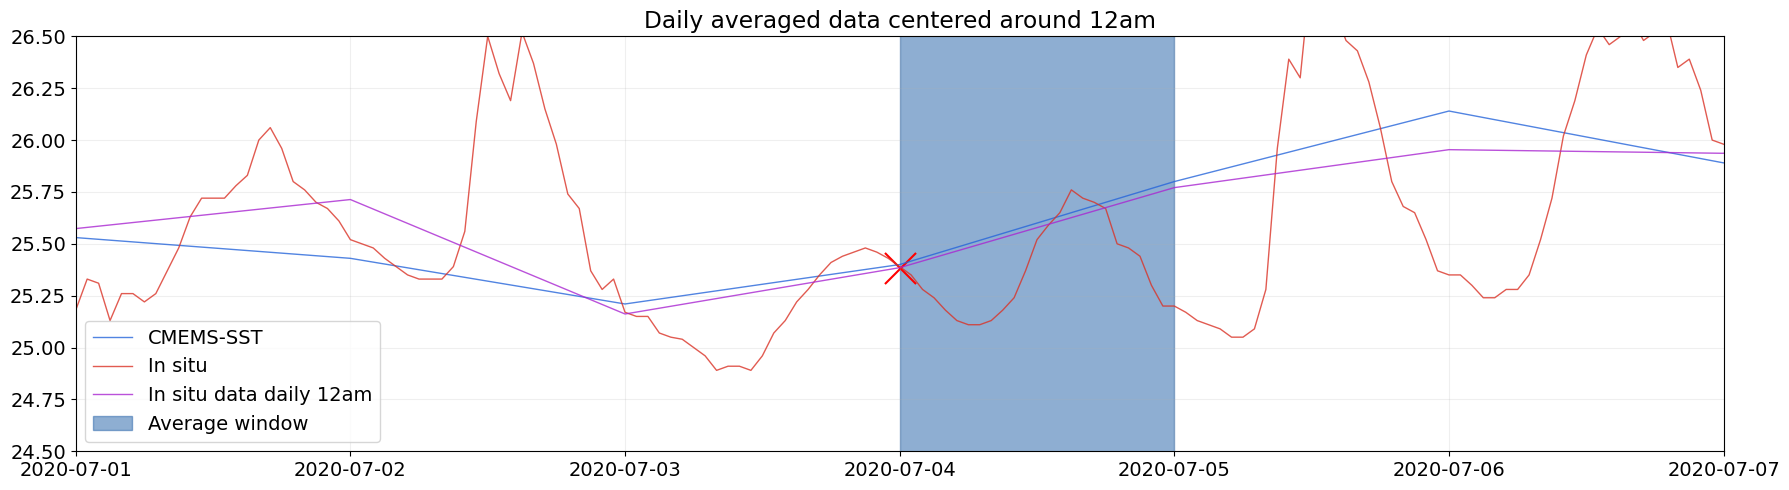

In [281]:
from data_plotters.timeseries_TEMP import plot_timeserie
from datetime import datetime
import matplotlib.pyplot as plt

date_start = datetime(2020, 6, 30)
date_end = datetime(2020, 7, 8)

plot_timeserie(
    vars = {
        "SST": ds_cmems_sst.T.sel(time=slice(date_start, date_end)),
        # "MFCs": ds_cmems_mfc_sst.T.sel(time=slice(date_start, date_end)),
        # "MFCd": ds_cmems_mfc_d.T.sel(time=slice(date_start, date_end)),
        "insitu": ds_dragonera_insitu.T.sel(time=slice(date_start, date_end)),
        # "insitun": ds_dragonera_insitu.T.where((
        #     (ds_dragonera_insitu.time.dt.hour <= 6) |
        #     (ds_dragonera_insitu.time.dt.hour >= 21)
        # )).sel(time=slice(date_start, date_end)),
        # "insitud": ds_dragonera_insitu.T.where((
        #     (ds_dragonera_insitu.time.dt.hour >= 6) &
        #     (ds_dragonera_insitu.time.dt.hour <= 21)
        # )).sel(time=slice(date_start, date_end)),
        # "insitu0am": ds_dragonera_insitu_daily_0am.T.sel(time=slice(date_start, date_end)),
        "insitu12am": ds_dragonera_insitu_daily_12am.T.sel(time=slice(date_start, date_end)),
        # "insitunight0am": ds_dragonera_insitu_daily_night.T.sel(time=slice(date_start, date_end)),
        # "insitunight12am": ds_dragonera_insitu_daily_night_12am.T.sel(time=slice(date_start, date_end)),
        # "insitufoundation": ds_dragonera_insitu_foundation.T.sel(time=slice(date_start, date_end)),
    },
    times = {
        "SST": ds_cmems_sst.time.sel(time=slice(date_start, date_end)),
        "MFCs": ds_cmems_mfc_sst.time.sel(time=slice(date_start, date_end)),
        "MFCd": ds_cmems_mfc_d.time.sel(time=slice(date_start, date_end)),
        "insitu": ds_dragonera_insitu.time.sel(time=slice(date_start, date_end)),
        "insitun": ds_dragonera_insitu.time.where((
            (ds_dragonera_insitu.time.dt.hour <= 6) |
            (ds_dragonera_insitu.time.dt.hour >= 21)
        )).sel(time=slice(date_start, date_end)),
        "insitud": ds_dragonera_insitu.time.where((
            (ds_dragonera_insitu.time.dt.hour >= 6) |
            (ds_dragonera_insitu.time.dt.hour <= 21)
        )).sel(time=slice(date_start, date_end)),
        "insitu0am": ds_dragonera_insitu_daily_0am.time.sel(time=slice(date_start, date_end)),
        "insitu12am": ds_dragonera_insitu_daily_12am.time.sel(time=slice(date_start, date_end)),
        "insitunight0am": ds_dragonera_insitu_daily_night.time.sel(time=slice(date_start, date_end)),
        "insitunight12am": ds_dragonera_insitu_daily_night_12am.time.sel(time=slice(date_start, date_end)),
        "insitufoundation": ds_dragonera_insitu_foundation.time.sel(time=slice(date_start, date_end)),
    },
    labels = {
        "SST": "CMEMS-SST",
        "MFCs": "CMEMS-MFC SST",
        "MFCd": "CMEMS-MFC 3m",
        "insitu": "In situ",
        "insitun": "In situ night",
        "insitud": "In situ day",
        "insitu0am": "In situ data daily 0am",
        "insitu12am": "In situ data daily 12am",
        "insitunight0am": "In situ night data daily 0am",
        "insitunight12am": "In situ night data daily 12am",
        "insitufoundation": "In situ foundation data",
    },
    colors = {
        "SST": "#2665DACC",
        "MFCs": "CMEMS-MFC SST",
        "MFCd": "CMEMS-MFC 3m",
        "insitu": "#DA3226CC",
        "insitun": "r",
        "insitud": "#919191A1",
        "insitu0am": "#54BD23CC",
        "insitu12am": "#A926D1CC",
        "insitunight0am": "#2330DFCC",
        "insitunight12am": "#8559D8CC",
        "insitufoundation": "#DDBA1CCC",
        # "Dragonera insitu": "#DA3226CC",
        # "CMEMS-SST": "#2665DACC",
        # "CMEMS-MFC": "#54BD23CC",
        # "CMEMS-MFCd": "#A926D1CC",
    },
    title = "Daily averaged data centered around 12am",
    fontsize = 14,
    ylim=(24.5, 26.5),
    xlim=(datetime(2020, 7, 1), datetime(2020, 7, 7)),
    show_plot=False
)
with plt.rc_context({'font.size': 14}):
    plt.fill_between([datetime(2020, 7, 4), datetime(2020, 7, 5)], 30, color="#2965AA86", label="Average window")
    # plt.scatter(datetime(2020, 7, 3), ds_dragonera_insitu_foundation.T.sel(time=datetime(2020, 7, 3)), s=500, marker="x", color="r")
    plt.scatter(datetime(2020, 7, 4), ds_dragonera_insitu_daily_12am.T.sel(time=datetime(2020, 7, 4)), s=500, marker="x", color="r")
    # plt.scatter(datetime(2020, 7, 5), ds_dragonera_insitu_foundation.T.sel(time=datetime(2020, 7, 5)), s=500, marker="x", color="r")

    plt.legend()

plt.show()
plt.clf()
plt.close("all")